ATCGAGGAC
['A', 'C', 'G', 'T']
['A', 'C', 'G', 'T']
{'A': 3, 'C': 2, 'G': 3, 'T': 1}


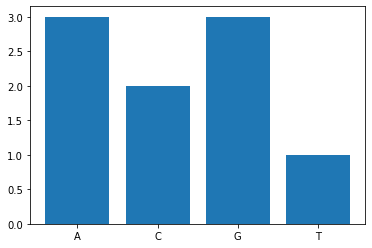

TAGCTCCTG
GTCCTCGAT
IED
Defined Protein Sequence MET
Convert 1 letter to 3 letter version in previous protein example
MET
GLU
THR
    A   C   D   E   F   G   H   I   K   L   M   N   P   Q   R   S   T   V   W   Y   B   Z   X   *
A   4   0  -2  -1  -2   0  -2  -1  -1  -1  -1  -2  -1  -1  -1   1   0   0  -3  -2  -2  -1   0  -4
C   0   9  -3  -4  -2  -3  -3  -1  -3  -1  -1  -3  -3  -3  -3  -1  -1  -1  -2  -2  -3  -3  -2  -4
D  -2  -3   6   2  -3  -1  -1  -3  -1  -4  -3   1  -1   0  -2   0  -1  -3  -4  -3   4   1  -1  -4
E  -1  -4   2   5  -3  -2   0  -3   1  -3  -2   0  -1   2   0   0  -1  -2  -3  -2   1   4  -1  -4
F  -2  -2  -3  -3   6  -3  -1   0  -3   0   0  -3  -4  -3  -3  -2  -2  -1   1   3  -3  -3  -1  -4
G   0  -3  -1  -2  -3   6  -2  -4  -2  -4  -3   0  -2  -2  -2   0  -2  -3  -2  -3  -1  -2  -1  -4
H  -2  -3  -1   0  -1  -2   8  -3  -1  -3  -2   1  -2   0   0  -1  -2  -3  -2   2   0   0  -1  -4
I  -1  -1  -3  -3   0  -4  -3   4  -3   2   1  -3  -3  -3  -3  -2  -1   3  -3  -1  -3 

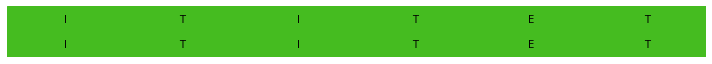


Global alignments
MITITET
-ITITET


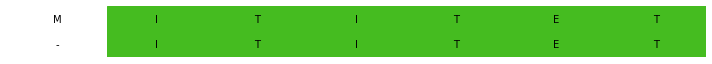

Global Score: 18
Global Sequence Identity: 1.0


In [138]:
#Load Biotite and other packages
import biotite
import biotite.sequence as seq
import biotite.sequence.align as align
import biotite.sequence.graphics as graphics
import biotite.database.entrez as entrez
import biotite.sequence.io.fasta as fasta
import matplotlib.pyplot as plt

#Methods
#print(dir(biotite))
#print(dir(seq))
#print(dir(align))
#print(dir(entrez))

#Create DNA sequence
dna = seq.NucleotideSequence("ATCGAGGAC")
print(dna)
#print(dir(dna))

#Check for Alphabet in Nucleotide
print(dna.get_alphabet())
print(dna.alphabet)

#Get count of frequency
freq = dna.get_symbol_frequency()
print(freq)

#Plot of frequency
plt.bar(freq.keys(), freq.values())
plt.show()

#Complement
print(dna.complement())

#Reverse complement
print(dna.complement()[::-1])

#DNA to protein, no transcription method in Biotite
protein = dna.translate(complete=True)
print(protein)

protein_seq = seq.ProteinSequence("MET")
print("Defined Protein Sequence",protein_seq)

print("Convert 1 letter to 3 letter version in previous protein example")
for symbol in protein_seq:
    print(seq.ProteinSequence.convert_letter_1to3(symbol))
    

#Sequence Alignment - finding regions that are similar, local or global, can use protein or DNA
#Global: Needleman-Wunsch algorithm
#Local: Smith-Waterman algorithm
seq1 = seq.ProteinSequence("MITITET")
seq2 = seq.ProteinSequence("ITITET")

#Need Substitution Matrix for alignmment in Biotite

#Protein Matrix, 4 points means a match is present
p_matrix = align.SubstitutionMatrix.std_protein_matrix()
print(p_matrix)

#Nucleotide Matrix, 5 points means a match is present
n_matrix = align.SubstitutionMatrix.std_nucleotide_matrix()
print(n_matrix,"\n")

#More fancyful alignments graph
def fancy_alignment(alignment_type):
    fig,ax = plt.subplots(figsize=(10,1))
    graphics.plot_alignment_similarity_based(ax,alignment_type[0],
                                         matrix=p_matrix,symbols_per_line=len(alignment_type[0]))
    fig.tight_layout()
    plt.show()

def all_alignments(alignments):
    for a in alignments:
        print(a)

print("Local alignments")
local_alignments = align.align_optimal(seq1,seq2,p_matrix,local=True)
all_alignments(local_alignments)
fancy_alignment(local_alignments)

print("\nGlobal alignments")
global_alignments = align.align_optimal(seq1,seq2,p_matrix,local=False)
all_alignments(global_alignments)
fancy_alignment(global_alignments)

#Get alignment score and seq identity
print("Global Score:",global_alignments[0].score)
print("Global Sequence Identity:",align.get_sequence_identity(global_alignments[0])) #seq1 and seq2 are identical but not the same

29903 30119
{'A': 8954, 'C': 5492, 'G': 5863, 'T': 9594} {'A': 7900, 'C': 6116, 'G': 6304, 'T': 9799}
37.97277865097147 41.23642883229855


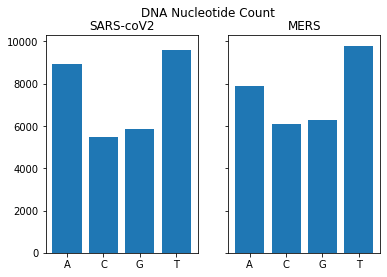

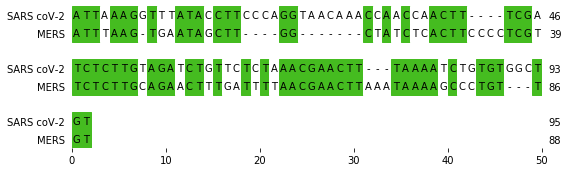

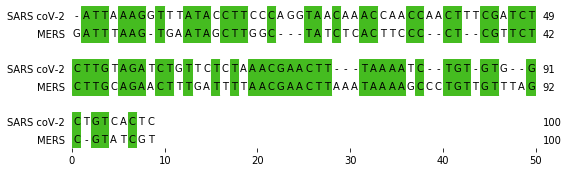

59.80392156862745
60.18518518518518


In [154]:
#Get database name
#print(entrez.get_database_name("Nucleotide"))

#Real example, gets data from NCBI using the Reference Sequence
sarscov2_file_path = entrez.fetch("NC_045512","mypdb_dir",suffix="fa",db_name="nuccore",ret_type="fasta")
sarscov2_file = fasta.FastaFile()
sarscov2_file.read(sarscov2_file_path)

mers_file_path = entrez.fetch("NC_019843.3","mypdb_dir",suffix="fa",db_name="nuccore",ret_type="fasta")
mers_file = fasta.FastaFile()
mers_file.read(mers_file_path)

def get_seq(file):
    #return [seq.NucleotideSequence(sequence) for header,sequence in file.items()]
    for header,sequence in file.items():
        return seq.NucleotideSequence(sequence)

sarscov2_seq = get_seq(sarscov2_file)
mers_seq = get_seq(mers_file)

#Check for length, frequency, alignment and GC count

#Length of sequence
print(len(sarscov2_seq),len(mers_seq))

#Frequency of Nucleotides
freq_sarscov2 = sarscov2_seq.get_symbol_frequency()
freq_mers = mers_seq.get_symbol_frequency()

print(freq_sarscov2, freq_mers)

#Get GC Content of DNA to understand stability, melting point
def get_GC_content(sequence):
    return float(str(sequence).count("G") + str(sequence).count("C"))/len(sequence) * 100

print(get_GC_content(sarscov2_seq), get_GC_content(mers_seq))

#Plot
fig, ax = plt.subplots(1, 2, sharey=True)
fig.suptitle("DNA Nucleotide Count")
ax[0].set_title("SARS-coV2")
ax[0].bar(freq_sarscov2.keys(), freq_sarscov2.values())

ax[1].set_title("MERS")
ax[1].bar(freq_mers.keys(), freq_mers.values())
plt.show()

#Alignment between SARS coV-2 and MERS, Use BLAST online to compare entire genome
mini_sarscov2 = sarscov2_seq[:100]
mini_mers = mers_seq[:100]

#Use n_matrix from before
custom_local_alignment = align.align_optimal(mini_sarscov2,mini_mers,n_matrix,local=True,gap_penalty=(-10,-1),terminal_penalty=False)
custom_global_alignment = align.align_optimal(mini_sarscov2,mini_mers,n_matrix,local=False)

#To get all alignments
#all_alignments(custom_local_alignment)
#all_alignments(custom_global_alignment)

def updated_fancy_alignment(alignment_type):
    fig = plt.figure(figsize=(8.0,2.5))
    ax = fig.add_subplot(111)
    graphics.plot_alignment_similarity_based(ax,alignment_type[0],
                                             matrix=n_matrix,labels=["SARS coV-2","MERS"],
                                             show_numbers=True, show_line_position=True)
    fig.tight_layout()
    plt.show()

updated_fancy_alignment(custom_local_alignment)
updated_fancy_alignment(custom_global_alignment)

#Quite similar and both are under the same Coronavirus family


#How identical are both, using the first alignment
print(align.get_sequence_identity(custom_local_alignment[0])*100)
print(align.get_sequence_identity(custom_global_alignment[0])*100)